In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.decomposition import KernelPCA,PCA


In [2]:
dataset = pd.read_csv('AB_NYC_2019.csv')
dataset_copy = dataset.copy()

In [3]:
dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
dataset.drop(columns=['id','name','host_id','host_name','last_review'],inplace=True)

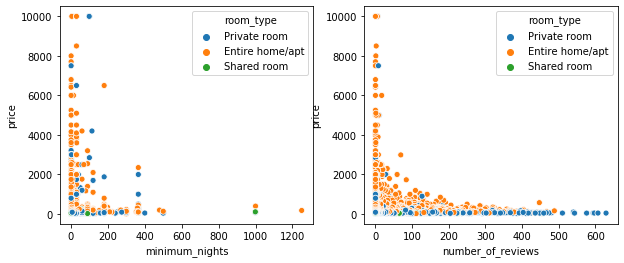

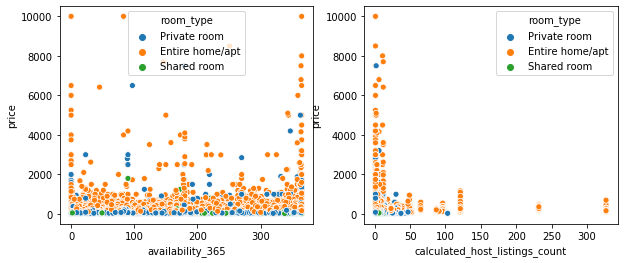

In [7]:
fig,axs = plt.subplots(1,2,figsize=(10,4))
sns.scatterplot(dataset['minimum_nights'],dataset['price'],dataset['room_type'],ax=axs[0])
sns.scatterplot(dataset['number_of_reviews'],dataset['price'],dataset['room_type'],ax=axs[1])

fig,axs = plt.subplots(1,2,figsize=(10,4))
sns.scatterplot(dataset['availability_365'],dataset['price'],dataset['room_type'],ax=axs[0])
sns.scatterplot(dataset['calculated_host_listings_count'],dataset['price'],dataset['room_type'],ax=axs[1])

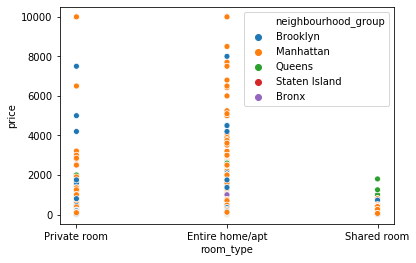

In [8]:
sns.scatterplot(dataset['room_type'],dataset['price'],dataset['neighbourhood_group'])

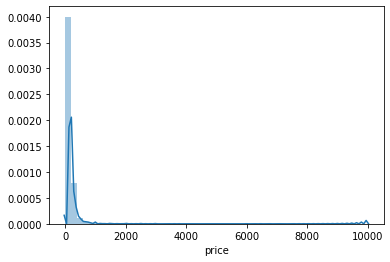

In [9]:
sns.distplot(dataset['price'])

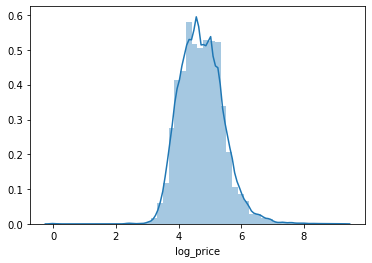

In [10]:
dataset['log_price'] = np.log(dataset['price']+1)
sns.distplot(dataset['log_price'])
dataset.drop(columns=['price'],inplace=True)

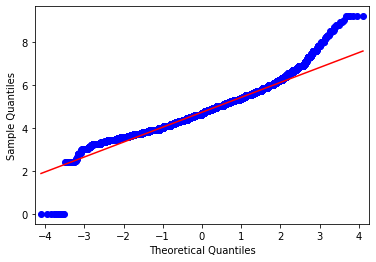

In [11]:
qqplot(dataset['log_price'],line='s')
plt.show()

In [12]:
dataset['reviews_per_month'].fillna(dataset['reviews_per_month'].mean(),inplace=True)

In [13]:
dataset.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
log_price                         0
dtype: int64

In [14]:
dataset['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [15]:
dataset['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
dataset['neighbourhood'] = dataset['neighbourhood'].astype("category").cat.codes
dataset['neighbourhood_group'] = dataset['neighbourhood_group'].astype("category").cat.codes
dataset['room_type'] = dataset['room_type'].astype("category").cat.codes

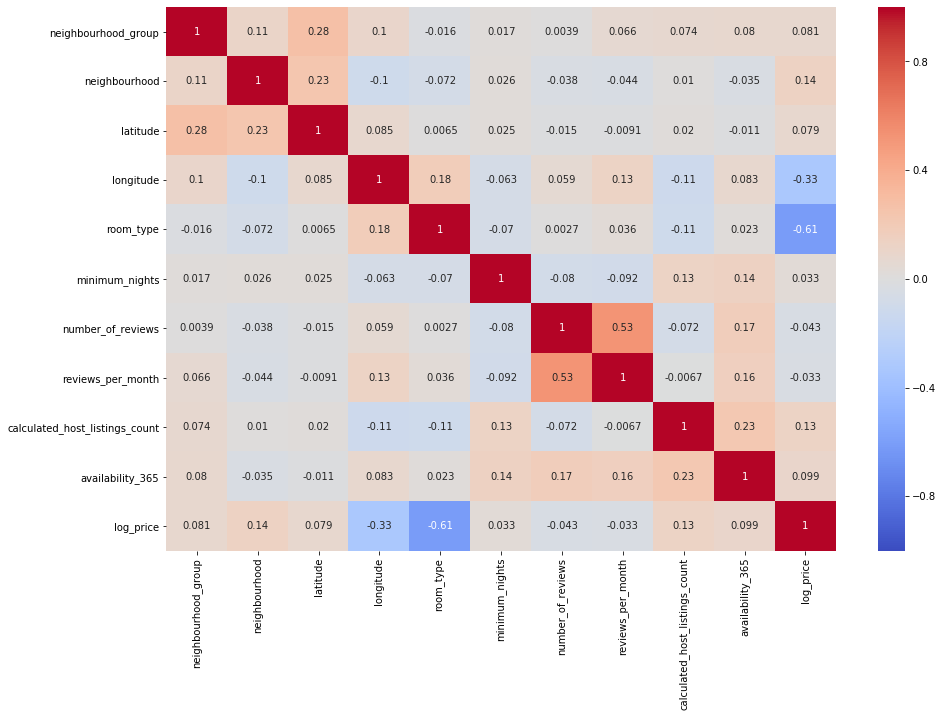

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),vmin=-1,cmap='coolwarm',annot=True);

In [19]:
y = dataset['log_price']
X = dataset.drop('log_price',axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### MODEL1

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
def Linear_R(X,y,cv=3):
    parameter = {'normalize':[True,False]}
    lr = LinearRegression()
    gs = GridSearchCV(lr,param_grid=parameter,scoring='neg_mean_squared_error',cv=cv)
    gs.fit(X,y)
    print(gs.best_params_)
    print(gs.best_score_)
    print(gs.best_estimator_)

In [23]:
Linear_R(X_train,y_train)

{'normalize': True}
-0.2617644770988262
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


#### MODEL 2

In [26]:
from sklearn.linear_model import Ridge
def Ridge_R(X,y,cv=3):
    parameter = {'normalize':[True,False],'alpha':[0.0001,0.001,0.01,0.1,1,2]}
    lr = Ridge()
    gs = GridSearchCV(lr,param_grid=parameter,scoring='neg_mean_squared_error',cv=cv)
    gs.fit(X,y)
    print(gs.best_params_)
    print(gs.best_score_)
    print(gs.best_estimator_)

In [25]:
Ridge_R(X_train,y_train)

{'alpha': 0.001, 'normalize': True}
-0.2617636053366215
Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)


In [64]:
def linear_poly_r(lr):
    train_acc=[]
    test_acc=[]
    for i in range(2,5):
        pf = PolynomialFeatures(degree=i)
        poly_train = pf.fit_transform(X_train)
        poly_test = pf.transform(X_test)
        lr.fit(poly_train,y_train)
        train_acc.append(r2_score(y_train,lr.predict(poly_train)))
        test_acc.append(r2_score(y_test,lr.predict(poly_test)))
    
    ax1 = sns.lineplot(list(range(2,5)),train_acc,label='Actual')
    sns.lineplot(list(range(2,5)),test_acc,label='Predict', ax=ax1)

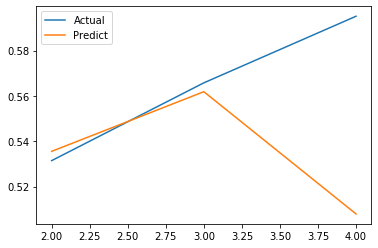

In [65]:
lr = LinearRegression(normalize=True)
linear_poly_r(lr)

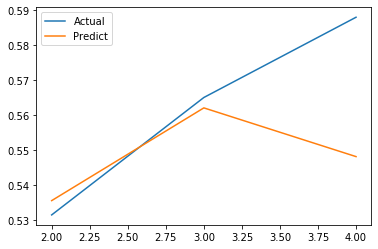

In [66]:
rid = Ridge(alpha=0.001,normalize=True)
linear_poly_r(rid)

In [59]:
pf = PolynomialFeatures(degree=3)
poly_train = pf.fit_transform(X_train)
poly_test = pf.transform(X_test)
rid.fit(poly_train,y_train)
y_pred = rid.predict(poly_test)
print('r2_score->',r2_score(y_test,y_pred))
print('mean_absolute_error->',mean_absolute_error(y_test,y_pred))
print('root_mean_absolute_error->',np.sqrt(mean_absolute_error(y_test,y_pred)))

r2_score-> 0.5620774536978577
mean_absolute_error-> 0.3313355184471198
root_mean_absolute_error-> 0.5756175105459526


In [45]:
df = pd.DataFrame({'y_true':y_test,'y_pred':y_pred})
df.head(10)

,y_true,y_pred
43813,5.420535,5.721307
32734,6.476972,5.576694
25276,5.707110,5.211962
36084,3.295837,4.298100
17736,4.836282,4.769470
15253,3.912023,3.972167
7332,4.615121,4.574702
40178,5.170484,4.665427
48175,4.454347,4.598640
14403,4.262680,4.254472


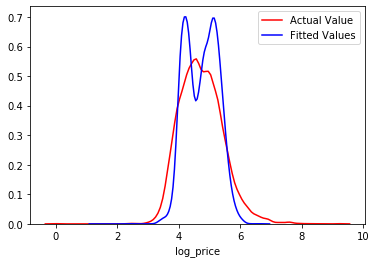

In [53]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)